<a href="https://colab.research.google.com/github/vanderbilt-ml/51-assign06-bray/blob/main/employee_churn_bray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6

# Feature 1: College Diploma

Based on the existing "Education" feature, I created a new feature called CollegeDiploma to see if it made a difference if an employee who has earned a degree is less or more likely to leave the company. 

My hypothesis is that employees who don't have at least a bachelors degree may not want to leave if they are worried about finding employment outside of the company because of there qualifications.



# Feature 2: Employee Generation

I wanted to take a deeper dive on the existing "Age" feature to explore if generational data could have an impact on attrition rates. I created a new feature call "Generation" which categorizes employees age groups by Gen Z (0-25), Gen Millenial (26-40), Gen X (42-57), and Baby boomer (over 57).

My assumption would be that people who are baby boomers or gen X would have a lower rate of attrition due to the fact that they are more conservative and take less chances because it might be harder to find other employment because of their advanced age.

## Problem Formulation

In this example, we will use IBM's HR Attrition dataset, available here: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset.
The dataset contains data on 1470 employees. The variables covered in this dataset focus heavily on demographic attributes (e.g. gender, age and race), social related attributes (e.g. marital status) and work related attributes (e.g. tenure and pay).

In [436]:
#tables and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning
from sklearn.ensemble import GradientBoostingClassifier, RandomTreesEmbedding #Gradient Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Load Data

Here we first load the data into python using pandas and read it in as a pandas dataframe which is the format which we will use throughout the example. 

In [437]:
employee_df = pd.read_excel('IBM-HR-Data-Employee-Attrition.xlsx')
features = ['CollegeDegree'] # Has College Degree
features = ['Genration'] # Employee Generation
display(employee_df.head())
employee_df.info()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [438]:
employee_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Data cleaning and EDA

We can now briefly explore our data. For now, we can observe that there are a zero NA values which will likely need imputation. We'll wait for this step so that we can put it within our training loop in case future data sets from IBM HR might have NA values. You are welcome to explore additional aspects of the data and build out 2-3 features on your own

In [439]:
employee_df = employee_df.dropna(subset=['Attrition'])
employee_df.shape

(1470, 35)

Feature 1

In [440]:
#if 'CollegeDiploma' in features:
#employee_df.loc[employee_df['Education'] < 3, 'CollegeDegree'] = 'No Degree'
#employee_df.loc[employee_df['Education'] > 2, 'CollegeDegree'] = 'College Degree'
 
#employee_df.head()


Feature 2

In [441]:
#employee_df.loc[employee_df['Age'] < 26, 'Generation'] = 'Gen Z'
#employee_df.loc[(employee_df.Age > 25) & (employee_df.Age < 42), 'Generation'] = 'Millenial'
#employee_df.loc[(employee_df.Age > 42) & (employee_df.Age < 58), 'Generation'] = 'Gen X'
#employee_df.loc[(employee_df.Age > 42) & (employee_df.Age > 57), 'Generation'] = 'Boomer'

employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [442]:
class_column = 'Attrition'
random_seed = 2435

X_train, X_test, y_train, y_test = train_test_split(employee_df.drop(columns=class_column), employee_df[class_column],
                                                   test_size=0.25, random_state=random_seed, stratify=employee_df[class_column])

Quick sanity check to make sure that everything seems correct:

In [443]:
# X Train
print('On X train: ')
print('X train dimensions: ', X_train.shape)
display(X_train.head())

# X test
print('\nOn X test: ')
print('X test dimensions: ', X_test.shape)
display(X_test.head())

On X train: 
X train dimensions:  (1102, 34)


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1331,48,Travel_Rarely,1224,Research & Development,10,3,Life Sciences,1,1867,4,...,4,80,0,29,3,3,22,10,12,9
485,27,Travel_Rarely,798,Research & Development,6,4,Medical,1,655,1,...,3,80,2,6,5,2,5,3,0,3
1368,34,Travel_Frequently,735,Research & Development,22,4,Other,1,1932,3,...,2,80,0,16,3,3,15,10,6,11
579,34,Travel_Rarely,121,Research & Development,2,4,Medical,1,804,3,...,3,80,0,6,3,3,6,5,1,3
142,38,Travel_Rarely,364,Research & Development,3,5,Technical Degree,1,193,4,...,2,80,0,19,2,3,3,2,2,2



On X test: 
X test dimensions:  (368, 34)


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
129,49,Travel_Rarely,470,Research & Development,20,4,Medical,1,170,3,...,3,80,0,16,2,2,15,11,5,11
1120,38,Travel_Rarely,437,Sales,16,3,Life Sciences,1,1583,2,...,2,80,0,8,5,4,3,2,1,2
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
965,25,Travel_Rarely,882,Research & Development,19,1,Medical,1,1358,4,...,3,80,3,7,6,2,3,2,1,2
94,32,Travel_Rarely,1093,Sales,6,4,Medical,1,125,2,...,1,80,0,12,0,3,11,8,5,7


In [444]:
# X Train
print('On y train: ')
print('y train dimensions: ', y_train.shape)
display(y_train.head())

# X test
print('\nOn y test: ')
print('y test dimensions: ', y_test.shape)
display(y_test.head())

On y train: 
y train dimensions:  (1102,)


1331    No
485     No
1368    No
579     No
142     No
Name: Attrition, dtype: object


On y test: 
y test dimensions:  (368,)


129     No
1120    No
3       No
965     No
94      No
Name: Attrition, dtype: object

## Establish the training pipeline

We can now establish the training pipeline for our models. Since this is a process we would need to repeat several times, it's good to essentially functionalize the process so we do not need to re-write redundant code. Here, we can impute some values that were missing, and encode any categorical values. Note that these pipelines will change according to the model and methodology you choose - additionally, the pipelines will also change depending on the data types of the columns in your dataset. 

In [445]:
# TODO: establish your own pipelines for the different data types
cat_pipeline = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
                               ('onehot_cat', OneHotEncoder())])
num_pipeline = Pipeline(steps=[('impute_num', SimpleImputer(strategy='mean')),
                               ('scale_num', StandardScaler())])



In [446]:
# TODO: establish your preprocessing pipeline by your feature set
preprocess = ColumnTransformer([('cat_pipe', cat_pipeline, make_column_selector(dtype_include=object)),
                             ('num_pipe', num_pipeline, make_column_selector(dtype_include=np.number))],
                             remainder='passthrough')


LogisticRegression

In [447]:
# TODO: set up your modeling pipeline
pipeLR = Pipeline(steps=[('preproc', preprocess),
                       ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))])


# Feel free to uncomment and edit the code below to visualize your overall pipeline
with config_context(display='diagram'):
    display(pipeLR)


Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55674e0a90>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5564c98350>)])),
                ('mdl',
                 LogisticRegression(penalty='elasticnet', solver='saga',
                                    tol=0.01))])

RandomForest

In [448]:
# TODO: set up your modeling pipeline RandomForest
pipeRandForest = Pipeline([('preproc', preprocess),
                        ('rf', RandomForestClassifier())])

# Feel free to uncomment and edit the code below to visualize your overall pipeline
with config_context(display='diagram'):
    display(pipeRandForest)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55674e0a90>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5564c98350>)])),
                ('rf', RandomForestClassifier())])

GradientBoost

In [449]:
# TODO: set up your modeling pipeline GradientBoosting
pipeGradBoost = Pipeline(steps=[('preproc', preprocess),
                       ('gbc', GradientBoostingClassifier())])


# Feel free to uncomment and edit the code below to visualize your overall pipeline
with config_context(display='diagram'):
    display(pipeGradBoost)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55674e0a90>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5564c98350>)])),
                ('gbc', GradientBoostingClassifier())])

In [450]:
# TODO: set up your modeling pipeline
pipe = Pipeline(steps=[('preproc', preprocess),
('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))])

#pipe = Pipeline(steps=[('preproc', preproc),
#                       ('mdl', GradientBoostingClassifier())])

# pipe = Pipeline(steps=[('preproc', preproc),
#                        ('mdl', RandomForestClassifier())])


# Feel free to uncomment and edit the code below to visualize your overall pieline
with config_context(display='diagram'):
  display(pipe)


Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55674e0a90>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5564c98350>)])),
                ('mdl',
                 LogisticRegression(penalty='elasticnet', solver='saga',
                                    tol=0.01))])

## Cross-validation with hyperparameter tuning

Now that we have our pipelines, we can now use this as part of cross validation and hyperparameter tuning.

Logistic

In [451]:
# TODO: set up your tuning grid 
# grid_search_lr.get_params().keys()
tuning_grid_lr = {'mdl__l1_ratio' : np.linspace(0,1,5),
                           'mdl__C': np.logspace(-1, 6, 3) }
grid_search_lr = GridSearchCV(pipeLR, param_grid = tuning_grid_lr, cv = 5, return_train_score=True)

Random Forest

In [452]:
# TODO: set up your tuning grid
# grid_search_rf.get_params().keys()
tuning_grid_rf = param_grid = {'rf__n_estimators': [10, 50],
                                        'rf__max_features': ['auto', 'sqrt', 'log2'],
                                        'rf__max_depth' : [4,5,6],
                                        'rf__criterion' :['gini', 'entropy']
                                       }
grid_search_rf = GridSearchCV(pipeRandForest, param_grid = tuning_grid_rf, cv = 5, return_train_score=True)

Gradient Boosting

In [453]:
# TODO: set up your tuning grid
# grid_search_gb.get_params().keys()
tuning_grid_gb = param_grid = {'gbc__learning_rate': [1, 0.5, 0.25],
                                       'gbc__n_estimators': [64, 128, 256],
                                       'gbc__max_depth': [2, 4],
                                       'gbc__min_samples_split': [2, 4]
                                      }
grid_search_gb = GridSearchCV(pipeGradBoost, param_grid = tuning_grid_gb, cv = 5, return_train_score=True)

In [454]:
# TODO: fit your model
# Fit Logistic
grid_search_lr.fit(X_train, y_train)
# Fit RandomRainForest
grid_search_rf.fit(X_train, y_train)
# Fit Gradient Boosting
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f55674e0a90>),
                                                                        ('num_pipe',
                                                                    

# Best performing model parameters

Random Forest

In [455]:
# TODO: find the best performing model parameters and their values
#print(grid_search.best_score_)
#grid_search.best_params_

print("RandomForest best score:", grid_search_rf.best_score_)
grid_search_rf.best_params_

RandomForest best score: 0.8602591526120937


{'rf__criterion': 'gini',
 'rf__max_depth': 6,
 'rf__max_features': 'auto',
 'rf__n_estimators': 10}

LogisticRegression

In [456]:
print("LogisticRegression best score:", grid_search_lr.best_score_)
grid_search_lr.best_params_


LogisticRegression best score: 0.8811353352529823


{'mdl__C': 0.1, 'mdl__l1_ratio': 0.0}

GradientBoost

In [457]:
print("Grid search GradientBoost best score:", grid_search_gb.best_score_)
grid_search_gb.best_params_

Grid search GradientBoost best score: 0.8575442204853969


{'gbc__learning_rate': 0.25,
 'gbc__max_depth': 2,
 'gbc__min_samples_split': 2,
 'gbc__n_estimators': 64}

## Final fit

The final fit here is already present in the generated model due to the way we set our parameters in the grid search. If we want to look at the performance, we can do so. Here is a non-helpful description of the best model:

Gradient Boost

In [458]:
# TODO: print your best estimator (pipeline)
grid_search_gb.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55673b2a90>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                

RandomForest

In [459]:
# TODO: print your best estimator (pipeline)
grid_search_rf.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55648209d0>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                

Logistic

In [460]:
# TODO: print your best estimator (pipeline)
grid_search_lr.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5564da4310>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                

## Variable importance

Now we assess the importance in the selected model to reveal any potential insights.

RandomForest

In [461]:
# TODO: feel free to print out the target classes
grid_search_rf.classes_

array(['No', 'Yes'], dtype=object)

In [462]:
# TODO: feel free to uncomment and edit the code below to obtain your feature weights

vip_rf = grid_search_rf.best_estimator_['rf']
vip_rf

RandomForestClassifier(max_depth=6, n_estimators=10)

In [463]:
# TODO: feel free to uncomment and edit the code below to obtain your feature importance graph. 
# Did the graph surprise you? What features did you think were more important?

#get names in correct preproc order
cat_names = grid_search_rf.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()
num_names = grid_search_rf.best_estimator_.named_steps['preproc'].transformers_[1][2]

#create df with vip info
#coef_info = pd.DataFrame({'feat_names':np.hstack([cat_names, num_names]), 'vip': vip_rf})

#get sign and magnitude information
#coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             #coef_sign = np.sign(coef_info['vip']))

#sort and plot
#coef_info = coef_info.set_index('feat_names').sort_values(by='coef_mag', ascending=False)
#plt.figure(figsize = (17,15))
#sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False)

Gradient

In [464]:
# TODO: feel free to print out the target classes
grid_search_gb.classes_

array(['No', 'Yes'], dtype=object)

In [465]:
# TODO: feel free to uncomment and edit the code below to obtain your feature weights

vip_gb = grid_search_gb.best_estimator_['gbc']
vip_gb

GradientBoostingClassifier(learning_rate=0.25, max_depth=2, n_estimators=64)

In [466]:
# TODO: feel free to uncomment and edit the code below to obtain your feature importance graph. 
# Did the graph surprise you? What features did you think were more important?

#get names in correct preproc order
cat_names = grid_search_gb.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()
num_names = grid_search_gb.best_estimator_.named_steps['preproc'].transformers_[1][2]

#create df with vip info
#coef_info = pd.DataFrame({'feat_names':np.hstack([cat_names, num_names]), 'vip': vip_gb})

#get sign and magnitude information
#coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
 #                            coef_sign = np.sign(coef_info['vip']))

#sort and plot
#coef_info = coef_info.set_index('feat_names').sort_values(by='coef_mag', ascending=False)
#plt.figure(figsize = (17,15))
#sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False)

Logistic

In [467]:
# TODO: feel free to print out the target classes
grid_search_gb.classes_

array(['No', 'Yes'], dtype=object)

In [468]:
# TODO: feel free to uncomment and edit the code below to obtain your feature weights

vip_lr = grid_search_lr.best_estimator_['mdl'].coef_[0]
vip_lr

array([-0.51237804,  0.37271487, -0.15506065,  0.00716853, -0.37019199,
        0.06829964,  0.07509564, -0.28310764,  0.05440817, -0.18240641,
       -0.22313261,  0.26441903, -0.30442684,  0.00970302, -0.24283446,
        0.04906811,  0.36113364, -0.04059654, -0.19107902, -0.15500897,
       -0.22919555, -0.04055495,  0.19434393, -0.31760039, -0.30868321,
        0.33155978, -0.29472382, -0.9221971 ,  0.62747328, -0.27247474,
       -0.15673229,  0.29424819,  0.00547973,  0.        , -0.05432586,
       -0.31318137,  0.00662348, -0.30763855, -0.27624235, -0.34847904,
       -0.169724  , -0.01134077,  0.3354185 , -0.04154289, -0.03833024,
       -0.20515983,  0.        , -0.15195725, -0.10476019, -0.20350692,
       -0.28118898,  0.28794024, -0.38146376,  0.49976223, -0.479107  ])

['x0_Non-Travel' 'x0_Travel_Frequently' 'x0_Travel_Rarely'
 'x1_Human Resources' 'x1_Research & Development' 'x1_Sales'
 'x2_Human Resources' 'x2_Life Sciences' 'x2_Marketing' 'x2_Medical'
 'x2_Other' 'x2_Technical Degree' 'x3_Female' 'x3_Male'
 'x4_Healthcare Representative' 'x4_Human Resources'
 'x4_Laboratory Technician' 'x4_Manager' 'x4_Manufacturing Director'
 'x4_Research Director' 'x4_Research Scientist' 'x4_Sales Executive'
 'x4_Sales Representative' 'x5_Divorced' 'x5_Married' 'x5_Single' 'x6_Y'
 'x7_No' 'x7_Yes']
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 

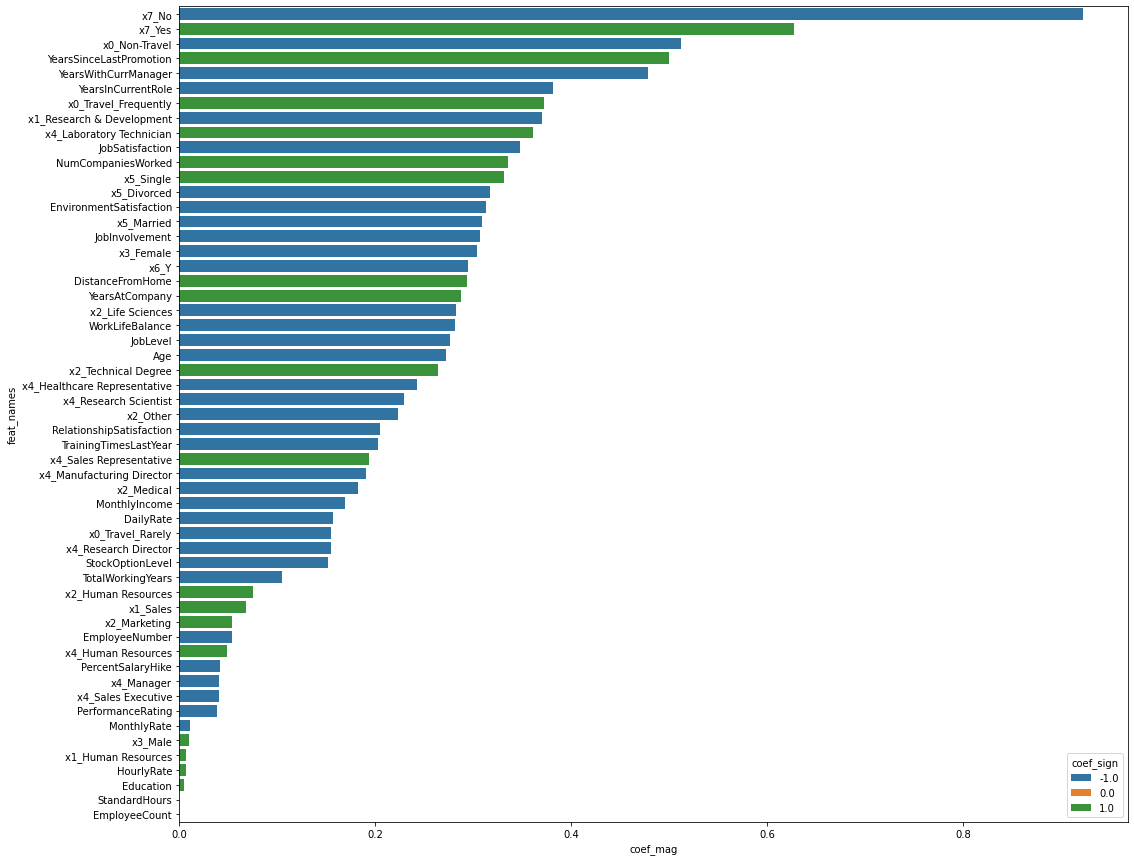

In [469]:
# TODO: feel free to uncomment and edit the code below to obtain your feature importance graph. 
# Did the graph surprise you? What features did you think were more important?

#get names in correct preproc order
cat_names = grid_search_lr.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()
num_names = grid_search_lr.best_estimator_.named_steps['preproc'].transformers_[1][2]

print(cat_names)
print(num_names)

#create df with vip info
coef_info = pd.DataFrame({'feat_names':np.hstack([cat_names, num_names]), 'vip': vip_lr})

#get sign and magnitude information
coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

#sort and plot
coef_info = coef_info.set_index('feat_names').sort_values(by='coef_mag', ascending=False)
plt.figure(figsize = (17,15))
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False)

## Performance metrics on test data


Here, we can see the performance of the model, which is pretty nice! We can also look into different scores specifically for more insight into the performance.

Logistic

In [470]:
# TODO: print your classification report of your model
print(classification_report(y_test, grid_search_lr.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

          No       0.91      0.98      0.94       309
         Yes       0.82      0.47      0.60        59

    accuracy                           0.90       368
   macro avg       0.87      0.73      0.77       368
weighted avg       0.89      0.90      0.89       368



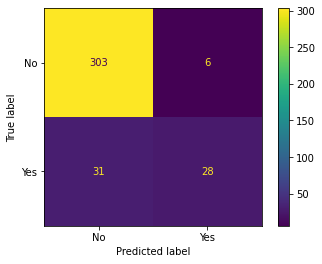

In [471]:
# TODO: plot the confusion matrix graph
confMatrix_lr = confusion_matrix(y_test, grid_search_lr.best_estimator_.predict(X_test))
confMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix=confMatrix_lr, 
                                           display_labels=grid_search_lr.classes_)
confMatrixDisplay.plot()
plt.show()

Gradient

In [472]:
# TODO: print your classification report of your model
print(classification_report(y_test, grid_search_gb.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

          No       0.89      0.95      0.92       309
         Yes       0.60      0.36      0.45        59

    accuracy                           0.86       368
   macro avg       0.74      0.66      0.68       368
weighted avg       0.84      0.86      0.84       368



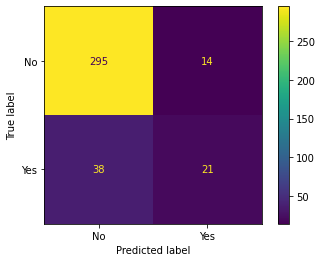

In [473]:
# TODO: plot the confusion matrix graph
confMatrix_gb = confusion_matrix(y_test, grid_search_gb.best_estimator_.predict(X_test))
confMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix=confMatrix_gb, 
                                           display_labels=grid_search_gb.classes_)
confMatrixDisplay.plot()
plt.show()

Random Forest

In [474]:
# TODO: print your classification report of your model
print(classification_report(y_test, grid_search_rf.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

          No       0.86      0.99      0.92       309
         Yes       0.69      0.15      0.25        59

    accuracy                           0.85       368
   macro avg       0.78      0.57      0.58       368
weighted avg       0.83      0.85      0.81       368



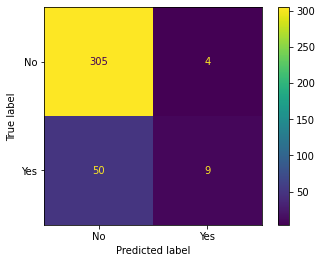

In [475]:
# TODO: plot the confusion matrix graph
confMatrix_rf = confusion_matrix(y_test, grid_search_rf.best_estimator_.predict(X_test))
confMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix=confMatrix_rf, 
                                           display_labels=grid_search_rf.classes_)
confMatrixDisplay.plot()
plt.show()

# Calculate the financial value of your models based on the following costs and benefits

*   Cost of replacing an employee is $120,000 (RC)

*   Cost of intervention $2,000 used on each employee predicted to leave (IC)

*   Intervention success rate is 20% (SR)

**Compare models on value, what is the best model according to your value metric?**


In [477]:
cost = np.array([[0, 2000], [120000, 2000 - 120000*0.2]])
# No features
total_cost_rf = np.multiply(confMatrix_rf, cost).sum()
print('Random Forest =', "${:,}".format(total_cost_rf))
print("TN:", 305, "FP:", 4, "FN:", 51, "TP:", 8 )
print("Accuracy:", 85, "%")
print("\n")

total_cost_gb = np.multiply(confMatrix_gb, cost).sum()
print('Gradient Boost =', "${:,}".format(total_cost_gb))
print("TN:", 295, "FP:", 14, "FN:", 38, "TP:", 21 )
print("Accuracy:", 86, "%")
print("\n")

total_cost_lr = np.multiply(confMatrix_lr, cost).sum()
print('Logistic Regression =', "${:,}".format(total_cost_lr))
print("TN:", 303, "FP:", 6, "FN:", 50, "TP:", 9 )
print("Accuracy:", 90, "%")
print("\n")

#With Fature 1 College
total_cost_with_college_feature_rf = 6094000
savings_rf_college = total_cost_with_college_feature_rf - total_cost_rf
print("Random w/College Feature", "${:,.2f}".format(total_cost_with_college_feature_rf))
print("Random w/College Feature Savings", "${:,.2f}".format(total_cost_with_college_feature_rf-total_cost_rf))
print("TN:", 305, "FP:", 4, "FN:", 52, "TP:", 7 )
print("Accuracy:", 85, "%")
print("\n")
total_cost_with_college_feature_gb = 3714000
savings_gb_college = total_cost_with_college_feature_gb - total_cost_gb
print("Gradient w/College Feature", "${:,.2f}".format(total_cost_with_college_feature_gb))
print("Gradient w/College Feature Savings", "${:,.2f}".format(total_cost_with_college_feature_gb-total_cost_gb))
print("TN:", 288, "FP:", 21, "FN:", 35, "TP:", 24 )
print("Accuracy:", 85, "%")
print("\n")
total_cost_with_college_feature_lr = 3115000
savings_lr_college = total_cost_with_college_feature_lr - total_cost_lr
print("Logistic w/College Feature", "${:,.2f}".format(total_cost_with_college_feature_lr))
print("Logistic w/College Feature Savings", "${:,.2f}".format(total_cost_with_college_feature_lr-total_cost_lr))
print("TN:", 303, "FP:", 6, "FN:", 31, "TP:", 28 )
print("Accuracy:", 90, "%")
print("\n")
#With Fature 2 Generation
total_cost_with_generation_feature_rf = 5959000
savings_rf_generation = total_cost_with_generation_feature_rf - total_cost_rf
print("Random w/Generation Feature", "${:,.2f}".format(total_cost_with_college_feature_rf))
print("Random w/Generation Feature Savings", "${:,.2f}".format(total_cost_with_college_feature_rf-total_cost_rf))
print("TN:", 306, "FP:", 3, "FN:", 51, "TP:", 8 )
print("Accuracy:", 85, "%")
print("\n")

total_cost_with_generation_feature_gb = 3848000
savings_gb_generation = total_cost_with_generation_feature_gb - total_cost_gb
print("Gradient w/Generation Feature", "${:,.2f}".format(total_cost_with_college_feature_gb))
print("Gradient w/Generation Feature Savings", "${:,.2f}".format(total_cost_with_college_feature_gb-total_cost_gb))
print("TN:", 292, "FP:", 17, "FN:", 36, "TP:", 23 )
print("Accuracy:", 86, "%")
print("\n")

total_cost_with_generation_feature_lr = 2988000
savings_lr_generation = total_cost_with_generation_feature_lr - total_cost_lr
print("Logistical w/Generation  Feature", "${:,.2f}".format(total_cost_with_generation_feature_lr))
print("Logistical w/Generation  Feature Savings", "${:,.2f}".format(savings_lr_generation))
print("TN:", 302, "FP:", 7, "FN:", 46, "TP:", 13 )
print("Accuracy:", 88, "%")
print("\n")

#With BOTH festures
total_cost_with_both_feature_rf = 5816000
savings_rf_both = total_cost_with_both_feature_rf - total_cost_rf
print("Random w/Both Features", "${:,.2f}".format(total_cost_with_college_feature_rf))
print("Random w/Both Features Savings", "${:,.2f}".format(total_cost_with_college_feature_rf-total_cost_rf))
print("TN:", 302, "FP:", 7, "FN:", 50, "TP:", 9 )
print("Accuracy:", 85, "%")
print("\n")

total_cost_with_both_feature_gb = 3848000
savings_gb_both = total_cost_with_both_feature_gb - total_cost_gb
print("Gradient w/Both Features", "${:,.2f}".format(total_cost_with_college_feature_gb))
print("Gradient w/Both Features Savings", "${:,.2f}".format(total_cost_with_college_feature_gb-total_cost_gb))
print("TN:", 306, "FP:", 3, "FN:", 51, "TP:", 8 )
print("Accuracy:", 86, "%")
print("\n")

total_cost_with_both_feature_lr = 3260000
savings_lr_both = total_cost_with_both_feature_lr - total_cost_lr
print("Logistical w/Both Features", "${:,.2f}".format(total_cost_with_college_feature_lr))
print("Logitical w/Both Features Savings", "${:,.2f}".format(total_cost_with_college_feature_lr-total_cost_lr))
print("TN:", 302, "FP:", 7, "FN:", 32, "TP:", 27 )
print("Accuracy:", 89, "%")
print("\n")

Random Forest = $5,810,000.0
TN: 305 FP: 4 FN: 51 TP: 8
Accuracy: 85 %


Gradient Boost = $4,126,000.0
TN: 295 FP: 14 FN: 38 TP: 21
Accuracy: 86 %


Logistic Regression = $3,116,000.0
TN: 303 FP: 6 FN: 50 TP: 9
Accuracy: 90 %


Random w/College Feature $6,094,000.00
Random w/College Feature Savings $284,000.00
TN: 305 FP: 4 FN: 52 TP: 7
Accuracy: 85 %


Gradient w/College Feature $3,714,000.00
Gradient w/College Feature Savings $-412,000.00
TN: 288 FP: 21 FN: 35 TP: 24
Accuracy: 85 %


Logistic w/College Feature $3,115,000.00
Logistic w/College Feature Savings $-1,000.00
TN: 303 FP: 6 FN: 31 TP: 28
Accuracy: 90 %


Random w/Generation Feature $6,094,000.00
Random w/Generation Feature Savings $284,000.00
TN: 306 FP: 3 FN: 51 TP: 8
Accuracy: 85 %


Gradient w/Generation Feature $3,714,000.00
Gradient w/Generation Feature Savings $-412,000.00
TN: 292 FP: 17 FN: 36 TP: 23
Accuracy: 86 %


Logistical w/Generation  Feature $2,988,000.00
Logistical w/Generation  Feature Savings $-128,000.00
T

# Feature 1 - College Diploma

Using the College Dimploma gave mixed results. It seems the Random Forest model did slightly worse than with no additional features, costing about $284,000 more than the orignal 284,000 with more false negatives and less true positives. 

Using the Gradient Boost model however seemed to be an implovement over the model with the original fetaures. It seems to cost 412,000 less. There are less false positives and more true positives than the original.



# Feature 2 - Employee Generation

Using the Employee Generation as a feature had somewhat similar results. It performed slightly worse with the Random Forest moodel. It was more accurate with the Gradient Boost and the Logistical Regression. The new feature created less False negatives and More true positives.

The "Generation" feature with the Logistical Regression model knocked the cost down to 2,988,000, saving $128,000 from the original Logitical Regression model, making it the most cost effective combination.

Of the two features, it appears to be more successful at making the model more accurate by cutting down false predictions.